# WeatherPy
----

### Analysis
* The wind speed appears to slightly increase as we move away from the equator; that is why in northern hemispheres most of the cities have 20 mph of wind speed.  
* Cities located near The Equator might not have the highest temperature, however their temperatures can remain high between 80-90 degrees.
* Humidities may be similar among cities even at the same Latitude. 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:

api_key = api_keys.api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_name = []
country = []
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_response = response["name"]
        print(f"Processing City {count} | {city_response}")
       
        count= count + 1
    except:
        print("City not found. Skipping...")
    continue
print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")

    

Beginning Data Retrieval
-------------------------------
Processing City 1 | Altona
Processing City 2 | Rikitea
Processing City 3 | Aklavik
Processing City 4 | Zhigansk
Processing City 5 | Lebu
Processing City 6 | Adrar
Processing City 7 | Peniche
City not found. Skipping...
Processing City 8 | Sol-Iletsk
Processing City 9 | Puerto Ayora
Processing City 10 | Atuona
City not found. Skipping...
City not found. Skipping...
Processing City 11 | Norman Wells
Processing City 12 | Port Lincoln
Processing City 13 | Saint-Philippe
Processing City 14 | Guilin
Processing City 15 | Belmonte
Processing City 16 | Talcahuano
Processing City 17 | Kapaa
Processing City 18 | Kupang
Processing City 19 | Hermanus
Processing City 20 | Port Hardy
Processing City 21 | Daru
Processing City 22 | Tsabong
Processing City 23 | Jamestown
Processing City 24 | Broome
Processing City 25 | Punta Arenas
City not found. Skipping...
Processing City 26 | Thompson
Processing City 27 | Hithadhoo
Processing City 28 | Caravel

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
W_Py = {
    "City": city_name,
    "Country": country,
    "Cloudiness": cloudiness,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

cities = pd.DataFrame(W_Py)

cities.to_csv("output_data/cities.csv")


cities.head()


,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Altona,US,90,1540521300,57,41.11,-90.16,50.00,6.93
1,Rikitea,PF,24,1540523126,100,-23.12,-134.97,71.54,9.33
2,Aklavik,CA,40,1540520100,92,68.22,-135.01,17.60,5.82
3,Zhigansk,RU,56,1540523127,79,66.77,123.37,6.78,3.96
4,Lebu,ET,12,1540523128,80,8.96,38.73,38.46,2.73


In [35]:
cities.count()

City          566
Country       566
Cloudiness    566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

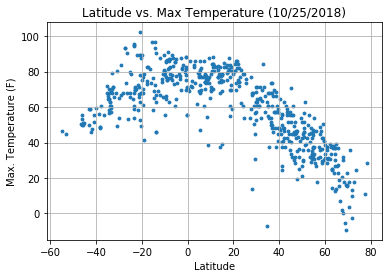

In [36]:
plt.scatter(cities["Lat"], cities["Max Temp"], marker="o", s=8)
plt.title("Latitude vs. Max Temperature (10/25/2018)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/MaxTempvsLatitude.png")
plt.show()

#### Latitude vs. Humidity Plot

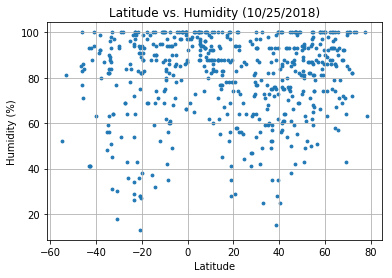

In [37]:
plt.scatter(cities["Lat"], cities["Humidity"], marker="o", s=8)
plt.title("Latitude vs. Humidity (10/25/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/HumidityvsLatitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

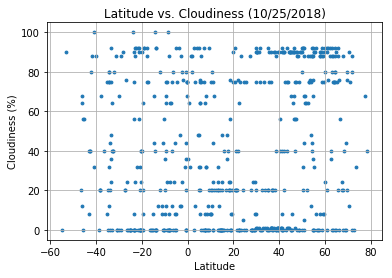

In [38]:
plt.scatter(cities["Lat"], cities["Cloudiness"], marker="o", s=8)
plt.title("Latitude vs. Cloudiness (10/25/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/CloudinessvsLatitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

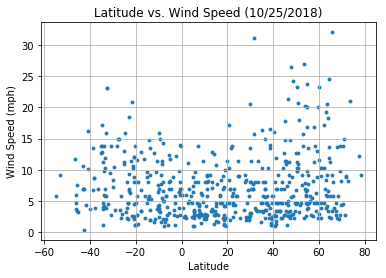

In [39]:
plt.scatter(cities["Lat"], cities["Wind Speed"], marker="o", s=8)
plt.title("Latitude vs. Wind Speed (10/25/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/WindSpeedvsLatitude.png")
plt.show()